Using selected questions from the 2012 and 2014 editions of the [European Social Survey](http://www.europeansocialsurvey.org/data/round-index.html), address the following questions. Keep track of your code and results in a Jupyter notebook or other source that you can share with your mentor. For each question, explain why you chose the approach you did.

[Here is the data file](https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv). [And here is the codebook, with information about the variable coding and content](https://thinkful-ed.github.io/data-201-resources/ESS_practice_data/ESS_codebook.html).

In this dataset, the same participants answered questions in 2012 and again 2014.

1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.
2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.
1. Who reported watching more TV in 2012, men or women?
1. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?
1. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?
1. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [417]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_rel
from scipy.stats import ttest_ind
from scipy.stats import shapiro
from scipy.stats import f_oneway
from scipy.stats import mannwhitneyu
from scipy.stats.mstats import kruskalwallis
import seaborn as sns

In [342]:
filepath = r'./Documents/GitHub/thinkful_notes/data_sets/ESSdata_Thinkful.txt'
ess_df = pd.read_csv(filepath)

In [343]:
ess_df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [344]:
ess_trust_df = pd.DataFrame(ess_df.groupby(['cntry', 'year', 'idno'])['ppltrst'].agg(np.mean)).reset_index()
ess_trust_df.head()

,cntry,year,idno,ppltrst
0,CH,6,5.0,3.0
1,CH,6,25.0,5.0
2,CH,6,26.0,8.0
3,CH,6,28.0,6.0
4,CH,6,29.0,6.0


In [345]:
#rearrange data
ess_trust_df = ess_trust_df.pivot_table(index=['idno', 'cntry'], columns=['year'], values=['ppltrst'])
ess_trust_df.columns = ["year_6", "year_7"]
ess_trust_df.loc[:,"year_diff"] = ess_trust_df["year_7"] - ess_trust_df["year_6"]
ess_trust_df.dropna(axis=0, inplace=True)
ess_trust_df[ess_trust_df.isnull().any(axis=1)]

,,year_6,year_7,year_diff
idno,cntry,,,


In [346]:
ess_country_df = pd.DataFrame(ess_trust_df.groupby(['cntry'])['year_6', 'year_7'].apply(lambda x: ttest_rel(x['year_6'], x['year_7'])))\
.rename(columns={0: 'ttest'})

In [235]:
ess_country_df = pd.concat([ess_country_df, ess_country_df['ttest'].apply(pd.Series).rename(columns={0:'statistic', 1:'pvalue'})], 
                           axis=1)

In [236]:
ess_country_df

,ttest,statistic,pvalue
cntry,,,
CH,"(-0.6586851756725737, 0.5102943511301135)",-0.658685,0.510294
CZ,"(-0.5001638336887216, 0.6171292682404208)",-0.500164,0.617129
DE,"(-0.18399501804849683, 0.8568563797095805)",-0.183995,0.856856
ES,"(2.4561906976601646, 0.014181580725321856)",2.456191,0.014182
NO,"(0.5073077081124404, 0.6120925701518767)",0.507308,0.612093
SE,"(-2.0671082026033982, 0.0390078167095776)",-2.067108,0.039008


There does not appear to be any significant changes in trust between the two years, for any of the countries.
# 2. 
Did people become happier from 2012 to 2014? Compute results for each country in the sample.

In [238]:
ess_hap_df = pd.DataFrame(ess_df.groupby(['cntry', 'year', 'idno'])['happy'].agg(np.mean)).reset_index()
ess_hap_df = ess_hap_df.pivot_table(index=['idno', 'cntry'], columns=['year'], values=['happy']).dropna(axis=0)
ess_hap_df.columns = ["year_6", "year_7"]
ess_hap_sum_df = pd.DataFrame(ess_hap_df.groupby(['cntry'])['year_6', 'year_7'].apply(lambda x: ttest_rel(x['year_6'], x['year_7'])))
ess_hap_sum_df = ess_hap_sum_df.rename(columns={0: 'ttest'})
ess_country_df = pd.concat([ess_hap_sum_df['ttest'].apply(pd.Series).rename(columns={0:'hap_statistic', 1:'hap_pvalue'}),
                            ess_country_df], axis=1)
ess_country_df

,hap_statistic,hap_pvalue,ttest,statistic,pvalue,ttest
cntry,,,,,,
CH,-0.319413,0.749500,"(-0.6586851756725737, 0.5102943511301135)",-0.658685,0.510294,"(-0.319412957862232, 0.7495001355428359)"
CZ,-1.456138,0.145845,"(-0.5001638336887216, 0.6171292682404208)",-0.500164,0.617129,"(-1.4561384833039597, 0.14584548433894534)"
DE,-0.806226,0.434614,"(-0.18399501804849683, 0.8568563797095805)",-0.183995,0.856856,"(-0.8062257748298549, 0.4346138707734991)"
ES,1.613832,0.106825,"(2.4561906976601646, 0.014181580725321856)",2.456191,0.014182,"(1.613832417735418, 0.1068245155648069)"
NO,4.285683,0.000021,"(0.5073077081124404, 0.6120925701518767)",0.507308,0.612093,"(4.2856826576235925, 2.0674530134057013e-05)"
SE,-0.558164,0.576871,"(-2.0671082026033982, 0.0390078167095776)",-2.067108,0.039008,"(-0.5581637086030012, 0.5768709591234161)"


In [250]:
#direction of change
ess_df.loc[ess_df.cntry == 'NO',:].groupby(['year'])['happy'].agg(np.mean)

year
6    8.251719
7    7.915185
Name: happy, dtype: float64

There was a significant decrease in happiness in Norway. 
# 3
Who reported watching more TV in 2012, men or women?


In [411]:
ess_df[['tvtot', 'gndr']].dropna(axis=0).groupby('gndr').agg([np.mean, shapiro])

tvtot                                              
          mean                                       shapiro
gndr                                                        
1.0   3.825603  (0.9438452124595642, 1.0865809543259836e-37)
2.0   3.892589   (0.9410152435302734, 3.082838965153947e-38)

In [412]:
tv_gender = [x for _, x in ess_df[['tvtot', 'gndr']].dropna(axis=0).groupby('gndr')['tvtot']]
mannwhitneyu(*tv_gender)

MannwhitneyuResult(statistic=9014615.5, pvalue=0.057725890580185825)

Women (code 2) reported slightly higher tv watching. The difference is barely significant.
# 4
Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

In [349]:
ess_df[['pplfair', 'partner']].dropna(axis=0).groupby(['partner']).agg([np.mean, shapiro])

pplfair                                              
            mean                                       shapiro
partner                                                       
1.0      6.06389   (0.9431131482124329, 5.365711949746157e-41)
2.0      5.91128  (0.9564833045005798, 3.0214600224609384e-30)

In [351]:
partner_fair = [x for _, x in ess_df[['pplfair', 'partner']].dropna(axis=0).groupby(['partner'])['pplfair']]
mannwhitneyu(*partner_fair)

MannwhitneyuResult(statistic=8218572.0, pvalue=0.0001017706466531828)

The distributions were not normal, so mann-whitny test was used. Those living with a partner (code 1) have a significantly higher fairness estimate of others.

# 5
Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

In [269]:
ess_meet_df = pd.DataFrame(ess_df[ess_df.year == 7].groupby(['cntry', 'idno'])['sclmeet'].agg(np.mean)).reset_index()

In [274]:
#null hyp for shapiro is data is from normal dist. looks ok.
ess_meet_df[['cntry', 'sclmeet']].dropna(axis=0).groupby('cntry').agg([shapiro, np.mean])

sclmeet          
                                            shapiro      mean
cntry                                                        
CH     (0.8974164724349976, 2.7436334896806913e-22)  5.160622
CZ      (0.9451602101325989, 7.663770300607355e-15)  4.445802
DE       (0.8616600036621094, 0.032099850475788116)  4.428571
ES      (0.8880351781845093, 9.848293928138278e-29)  5.260116
NO      (0.8881818056106567, 1.422473605641294e-22)  5.302326
SE      (0.8798282146453857, 6.682967662559975e-26)  5.426211

In [444]:
meeting_by_country = [x for _, x in ess_meet_df[['cntry', 'sclmeet']].dropna(axis=0).groupby('cntry')['sclmeet']]
f_oneway(*meeting_by_country)

F_onewayResult(statistic=44.127167288268076, pvalue=1.570803512782812e-44)

In [440]:
kruskalwallis([x for x in ess_meet_df[['cntry', 'sclmeet']].dropna(axis=0).groupby('cntry')['sclmeet'].agg(list).values])

ValueError: The input should be 2D

There is definitely some variation in the groups. Ttest shows this but nonparametric test is not accepting input.

# 6
Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [396]:
social = (ess_df[(ess_df.year == 7) & ess_df.cntry.isin(['CH', 'NO', 'SE'])][['cntry', 'sclact', 'agea']]
          .groupby(['cntry','agea'])
          .agg(np.mean))
social = social.unstack().T.dropna(axis=0).droplevel(0).astype(float)
social.apply(shapiro)

cntry
CH    (0.9381475448608398, 0.0015295783523470163)
NO    (0.8524107336997986, 5.989354008306691e-07)
SE    (0.9190481901168823, 0.0001941850787261501)
dtype: object

The Distributions are Normal. We can use parametric tests to compare these.

In [398]:
f_oneway(*social.values)

F_onewayResult(statistic=1.5970785038778121, pvalue=0.009326453064557916)

The means are not all similar.

In [392]:
ttest_rel(social.loc[:,'CH'].values, social.loc[:,'NO'].values)

Ttest_relResult(statistic=-1.455086614801216, pvalue=0.1500524894949184)

In [393]:
ttest_rel(social.loc[:,'CH'].values, social.loc[:,'SE'].values)

Ttest_relResult(statistic=-0.8880312297894127, pvalue=0.3775225159813196)

In [394]:
ttest_rel(social.loc[:,'SE'].values, social.loc[:,'NO'].values)

Ttest_relResult(statistic=-0.6752955985470775, pvalue=0.5016813923903858)

In fact, they all are significantly different.

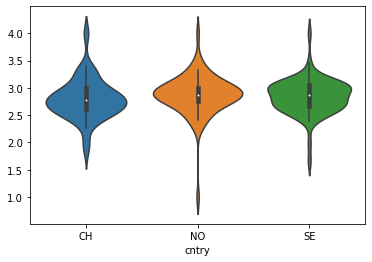

In [408]:
sns.violinplot(data=social);